## NegativeScan Very Skewness

5    0.886024
4    0.939047
3    0.977480
2    1.082693
1    1.320796
0    1.598219
Name: throughput_txn_per_sec, dtype: float64
5    1.024547
4    1.064780
3    1.107630
2    1.262481
1    1.602015
0    3.010105
Name: throughput_txn_per_sec, dtype: float64


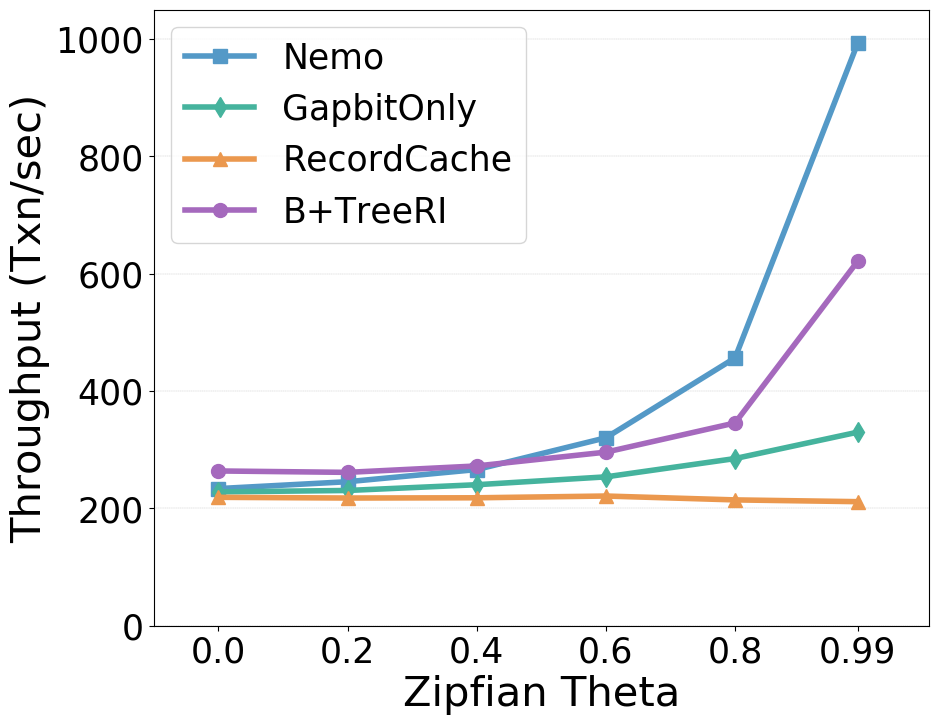

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx

txtsize=30
ticksize=25
zipf_theta = 0
color_indices, line_colors = select_color_idx(4)
nemo_batch_evict_c = "#31a354"
nemo_record_evict_c =  "#ea801c"

x_dimension = "zipf_theta_"
nemo_batch_evict_label = "Nemo"
nemo_record_evict_label = "RecordCache"

datadir = "../../output/negative_search/"
exp_tuple_batch_evict = "negativerange_varyskew_d2g_scatter_8"
exp_tuple_record_evict = "negativerange_varyskew_d2g_scatter_8"
exp_page = "negativerange_page_varyskew_d2g_scatter_8"


data_tuple_batch = [json.loads(line) for line in open(datadir + exp_tuple_batch_evict + ".txt")]
data_tuple_batch = [item for item in data_tuple_batch if item["g_negative_search_op_type"] == "GAPPHANTOM"]
df_tuple_batch = pd.DataFrame().from_records(data_tuple_batch).sort_values(by=x_dimension)

data_gapbit = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_gapbit = [item for item in data_gapbit if item["g_negative_search_op_type"] == "GAPBIT"]
df_gapbit = pd.DataFrame().from_records(data_gapbit).sort_values(by=x_dimension)


# data_tuple_record = [json.loads(line) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_tuple_record = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_tuple_record = [item for item in data_tuple_record if item["g_negative_search_op_type"] == "NOOP"]
df_tuple_record = pd.DataFrame().from_records(data_tuple_record).sort_values(by=x_dimension)


data_page = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_page + ".txt")]
data_page = [item for item in data_page if item["g_negative_search_op_enable"] == "False"]
df_page = pd.DataFrame().from_records(data_page).sort_values(by=x_dimension)


fig, ax1 = plt.subplots(figsize=(10, 8))

line_width= 4
ms = 10


def scrub_theta(series):
    # treat anything numerically equal to 1e-7 as zero
    return series.mask(np.isclose(series, 1e-7), 0)

nemo_x         = scrub_theta(df_tuple_batch[x_dimension])
nemo_gapbit_x  = scrub_theta(df_gapbit[x_dimension])
record_x       = scrub_theta(df_tuple_record[x_dimension])
page_x         = scrub_theta(df_page[x_dimension])

nemo_y = df_tuple_batch["throughput_txn_per_sec"]
nemo_gapbit_y = df_gapbit["throughput_txn_per_sec"]
record_y = df_tuple_record["throughput_txn_per_sec"]
page_y = df_page["throughput_txn_per_sec"]


print(nemo_y/page_y)
print(nemo_y/nemo_gapbit_y)
ax1.plot(nemo_x, 
         nemo_y,
        color=line_colors["BLUE"],
        marker="s", markersize=ms, linewidth=line_width, label="Nemo")

ax1.plot(nemo_gapbit_x, 
         nemo_gapbit_y,
        color=line_colors["GREEN"],
        marker="d", markersize=ms, linewidth=line_width, label="GapbitOnly")

ax1.plot(record_x, 
         record_y,
        color=line_colors["ORANGE"],
        marker="^", markersize=ms, linewidth=line_width, label="RecordCache")

ax1.plot(page_x, 
         page_y,
        color=line_colors["PURPLE"],
        marker="o", markersize=ms, linewidth=line_width, label="B+TreeRI")

ax1.set_xticks(nemo_x)
ax1.set_xticklabels(nemo_x, fontsize=ticksize)

ax1.tick_params(axis='y', labelsize=ticksize)
ax1.tick_params(axis='x', labelsize=ticksize)

ax1.set_ylim(0, 1050)
ax1.set_xlim(-0.1, 1.1)

ax1.set_ylabel("Throughput (Txn/sec)", fontsize=txtsize)

ax1.set_xlabel("Zipfian Theta", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)

# # Legend
ax1.legend(loc='upper left', fontsize=ticksize)



# plt.savefig("/home/hippo/Nemo/figures/negativescan_varyskew_d2g_scatter.pdf",bbox_inches='tight')


## NegativeRange Vary ScanLen (Skewed)

0    770.267
1    649.467
2    467.067
3    335.933
4    224.000
5    130.867
Name: throughput_txn_per_sec, dtype: float64
0    241.4000
1    220.0000
2    200.2670
3    174.8000
4    105.3330
5     68.5333
Name: throughput_txn_per_sec, dtype: float64
0    3.190833
1    2.952123
2    2.332221
3    1.921814
4    2.126589
5    1.909539
Name: throughput_txn_per_sec, dtype: float64


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


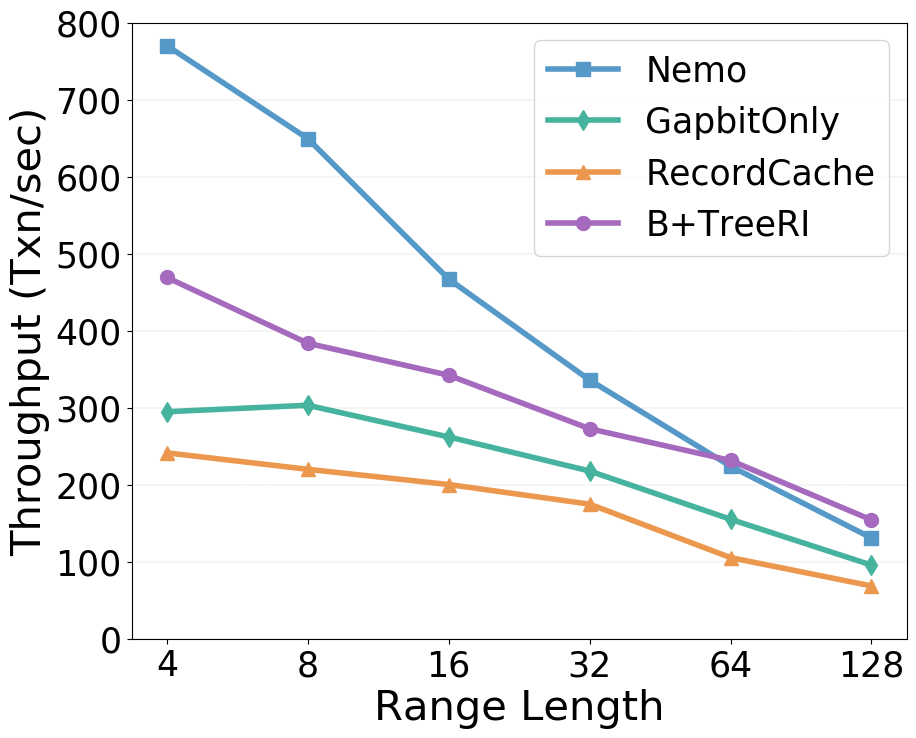

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx

txtsize=30
ticksize=25
zipf_theta = 0
color_indices, line_colors = select_color_idx(4)
nemo_batch_evict_c = "#31a354"
nemo_record_evict_c =  "#ea801c"

x_dimension = "g_scan_length"
nemo_batch_evict_label = "Nemo"
nemo_record_evict_label = "RecordCache"

datadir = "../../output/negative_search/"
exp_tuple_batch_evict = "negativerange_varyscanlen_d2g_scatter"
exp_tuple_record_evict = "negativerange_varyscanlen_d2g_scatter"
exp_page = "negativerange_page_varyscanlen_d2g_scatter"


data_tuple_batch = [json.loads(line) for line in open(datadir + exp_tuple_batch_evict + ".txt")]
data_tuple_batch = [item for item in data_tuple_batch if item["g_negative_search_op_type"] == "GAPPHANTOM"]
df_tuple_batch = pd.DataFrame().from_records(data_tuple_batch).sort_values(by=x_dimension)

data_gapbit = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_gapbit = [item for item in data_gapbit if item["g_negative_search_op_type"] == "GAPBIT"]
df_gapbit = pd.DataFrame().from_records(data_gapbit).sort_values(by=x_dimension)


# data_tuple_record = [json.loads(line) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_tuple_record = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_tuple_record_evict + ".txt")]
data_tuple_record = [item for item in data_tuple_record if item["g_negative_search_op_type"] == "NOOP"]
df_tuple_record = pd.DataFrame().from_records(data_tuple_record).sort_values(by=x_dimension)


data_page = [json.loads(line.replace("inf", "0")) for line in open(datadir + exp_page + ".txt")]
data_page = [item for item in data_page if item["g_negative_search_op_enable"] == "False"]
df_page = pd.DataFrame().from_records(data_page).sort_values(by=x_dimension)


fig, ax1 = plt.subplots(figsize=(10, 8))

line_width= 4
ms = 10
nemo_x = df_tuple_batch[x_dimension]
nemo_gapbit_x = df_gapbit[x_dimension]
record_x = df_tuple_record[x_dimension]
page_x = df_page[x_dimension]
x_axis = range(len(nemo_x))

nemo_y = df_tuple_batch["throughput_txn_per_sec"]
nemo_gapbit_y = df_gapbit["throughput_txn_per_sec"]
record_y = df_tuple_record["throughput_txn_per_sec"]
page_y = df_page["throughput_txn_per_sec"]
print(nemo_y)
print(record_y)
print(nemo_y/record_y)
ax1.plot(x_axis, 
         nemo_y,
        color=line_colors["BLUE"],
        marker="s", markersize=ms, linewidth=line_width, label="Nemo")

ax1.plot(x_axis, 
         nemo_gapbit_y,
        color=line_colors["GREEN"],
        marker="d", markersize=ms, linewidth=line_width, label="GapbitOnly")

ax1.plot(x_axis, 
         record_y,
        color=line_colors["ORANGE"],
        marker="^", markersize=ms, linewidth=line_width, label="RecordCache")

ax1.plot(x_axis, 
         page_y,
        color=line_colors["PURPLE"],
        marker="o", markersize=ms, linewidth=line_width, label="B+TreeRI")

ax1.set_xticks(x_axis)
ax1.set_xticklabels(nemo_x, fontsize=ticksize)

# ax1.set_yticklabels(fontsize=ticksize)
ax1.tick_params(axis='y', labelsize=ticksize)
ax1.tick_params(axis='x', labelsize=ticksize)


ax1.set_ylim(0, 800)

ax1.set_ylabel("Throughput (Txn/sec)", fontsize=txtsize)

ax1.set_xlabel("Range Length", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)

# # Legend
ax1.legend(loc='upper right', fontsize=ticksize)


plt.savefig("/home/hippo/Nemo/figures/negativescan_varyscanlen_d2g_scatter.pdf",bbox_inches='tight')
